<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 2 - Fronteras no Lineales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* similaridad: KNN
* Selección de hı́per-parámetros estructurales en SVM, Arboles de Decisión, k-NN y Redes Neuronales.
* Métodos de *kernel*.
* Extracción de características.
* Múltiples anotaciones

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de discusión y entrega: 8 de Noviembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF393-II-2018]

<hr style="height:2px;border:none"/>

### Paquetes de instalación

Como es usual utilizaremos *numpy, scipy, matplotlib* y *sklearn*. Además de éstas se necesitará instalar **keras**, una librerı́a en python para prototipado rápido de modelos basados en redes neuronales, muy similar en espı́ritu a *sklearn*. La librerı́a puede usar *TensorFlow* o *Theano* como backend, siendo éstas las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos. Para detalles sobre la instalación puede revisar [[1]](#refs) o escribir un email a su ayudante.



La tarea se divide en secciones:

[1.](#primero) Sentiment Analysis en Texto  
[2.](#segundo) pendiente


<a id="primero"></a>
## 1. Sentiment Analysis en Texto

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (*review*), en que una persona
manifiesta una opinión, como *positiva*, *negativa* o *neutral*. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas ası́ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en **Kaggle**,  en  el  contexto  de  una  competencia  organizada  por  la  Universidad  de  Stanford  [[2]](#refs).   Cada  registro disponible corresponderá a una opinión sobre una película, registrada sobre el sitio *Rotten Tomatoes*.  Para empezar  nos  limitaremos  a  estudiar  textos  anotados  como  positivos  o  negativos,  clases  que  codificaremos como +1 y 0 respectivamente. Los datos pueden ser descargados ejecutando el siguiente código en sistema Unix:
```
wget -O train_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
wget -O test_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev
```

> Cargue los dos conjuntos de datos a ser trabajados, donde la etiqueta ya viene codificada y la dejaremos como negativo (0) y positivo (1).
```python
import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
... #same loading for test
df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values
```

In [1]:
import pandas as pd
#Train Data
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")

#Test Data
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

#Texto Comentarios
df_train_text = df_train.Text
df_test_text = df_test.Text
#Etiquetas
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

df_train_text

0       everything's serious , poetic , earnest and --...
1       narratively , trouble every day is a plodding ...
2       a truly wonderful tale combined with stunning ...
3       jason patric and ray liotta make for one splen...
4       haneke keeps us at arm's length . guided more ...
5       richard pryor mined his personal horrors and c...
6       puts on airs of a hal hartley wannabe film -- ...
7       the characters are interesting and the relatio...
8       this long and relentlessly saccharine film is ...
9       the movie's progression into rambling incohere...
10        as lively an account as seinfeld is deadpan .\n
11      a damn fine and a truly distinctive and a deep...
12      [tries] to parody a genre that's already a jok...
13      there are as many misses as hits , but ultimat...
14           most of the action setups are incoherent .\n
15                          schindler's list it ain't .\n
16      it just goes to show , an intelligent person i...
17      a brac

> a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.
```python
df_train_sentiment.shape
```

In [2]:
import matplotlib.pyplot as plt

coments_by_sentiment = df_train.groupby(['Sentiment']).count()
print(coments_by_sentiment)
plt.bar(['0','1'], coments_by_sentiment['Text'], 0.35)
plt.xlabel('Etiquetas')
plt.ylabel('Nº Comentarios')
plt.show()

           Text
Sentiment      
0.0        1784
1.0        1770


<Figure size 640x480 with 1 Axes>

In [3]:
df_train_len = pd.DataFrame()
df_train_len['Sentiment'] = df_train['Sentiment']
df_train_len['Lenght Text'] = df_train['Text'].str.len()

lenght_by_sentiment = df_train_len.groupby(['Sentiment']).mean()
lenght_by_sentiment

,Lenght Text
Sentiment,
0.0,114.723094
1.0,114.690960


> b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.
```python
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= choose size, random_state=0)
```

In [4]:
import math
from sklearn.model_selection import train_test_split


print('Size of original train set :', df_train.shape[0])
#Se eligen el 20% de los datos de entrenamineto para validación
size_test_set = math.ceil(df_train.shape[0]*0.20)
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= size_test_set, random_state=0)


print('Size of new train set: ', df_train_text.shape[0])
print('Size of validation set: ', df_val_text.shape[0])

Size of original train set : 3554
Size of new train set:  2843
Size of validation set:  711


> c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (*lower-casing*), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), además de pasar las palabras a su tronco léxico con la técnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.
```python
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
... #try yourself
word_extractor("I love to eat cake")
word_extractor("I love eating cake")
word_extractor("I loved eating the cake")
word_extractor("I do not love eating cake")
word_extractor("I don't love eating cake")
... #try yourself
texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]
```

In [44]:
import re, time
import nltk
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from cucco import Cucco

def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #and (len(word) > 3): #delete stopwords
            words+=" "+word
    return words

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]
texts_train

[" could whole plan produce something make fatal attraction look like classic comparison ? 's sane rationale think swimfan 's existence .",
 ' stripped-down dramatic construct , austere imagery abstract character equal part poetry politics , obvious time evocative heartfelt .',
 ' nightmare date half-formed wit done great disservice lack critical distance sad trust liberal art college bumper sticker platitude .',
 " 're merely watching history , 're engulfed .",
 ' worth look curiosity .',
 ' move bond ; girl deserves sequel .',
 ' come like rejected abc afterschool special , freshened dunce screenwriting 101 class . . . . designed provide mix smile tear , `` crossroad `` instead provokes handful unintentional howler numerous yawn .',
 ' . . . roller-coaster ride movie',
 " 's wickedly subversive bent best part birthday girl .",
 " actor much charisma 'd happy listen reading phone book . hugh grant sandra bullock two likeable actor .",
 " 's hard say might enjoy , tolstoy groupie ? 's 

> d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?
```python
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
... #transform val and test
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
```

In [111]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer= CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train)

#Matriz dispersa con texto x terminos, con nº de ocurrencias
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)

#Vocabulario
vocab = vectorizer.get_feature_names()

dist_train =list(np.array(features_train.sum(axis=0)).reshape(-1,))
dist_val = list(np.array(features_val.sum(axis=0)).reshape(-1,))
dist_test = list(np.array(features_test.sum(axis=0)).reshape(-1,))
features_train

<2843x8541 sparse matrix of type '<class 'numpy.int64'>'
	with 30574 stored elements in Compressed Sparse Row format>

> e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados
```python
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()
```

(2843, 2)


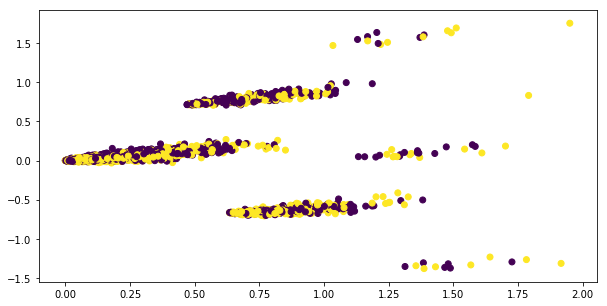

In [7]:
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
print(x_plot.shape)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

Se observan almenos 6 agrupaciones de textos(comentarios), que tendrian relación entre si. Sin embargo estas agrupaciones no se observan que tenga alguna relación la etiqueta de "sentimentalidad" del comentario, es decir, si es positivo o negativo, por que se puede decir desde la reducción de dimensionalidad de LSA es que de acuerdo a TF los comentarios son similares si utilizan terminos similares, por lo que no necesariamente comentarios positivos tendran terminos similares, lo mismo ocurre con los comentarios negativos. Por lo tanto como se observa que comentarios y negativos se tienden a agrupar en un mismo "grupo", esto se deveria que estos hablan de la misma pelicula o generos similares de esta, en este sentido si se tienden a repetir terminos como lo son los personajes o titulos de las películas.

> f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.
```python
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4)]
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= ...)
```

Param C=  0.0001
Param C=  0.001
Param C=  0.01
Param C=  0.1
Param C=  1.0
Param C=  10.0
Param C=  100.0
Param C=  1000.0


c:\users\castillo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


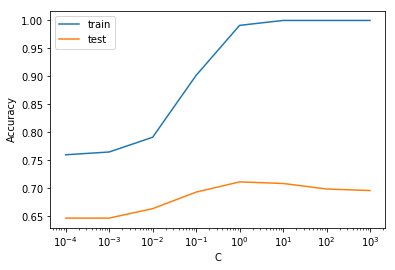

In [8]:
from sklearn.linear_model import LogisticRegression

def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(penalty='l2',C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

Cs = [10**i for i in np.arange(-4,4, dtype = float)]

def plt_LOGIT(x, y, xv, yv, Cs):
    train_error = []
    test_error = []
    for c in Cs:   
        model, train_acc, test_acc = do_LOGIT(x,y,xv,yv, param=c)
        train_error.append(train_acc)
        test_error.append(test_acc)
    plt.plot(Cs, train_error, label='train')
    plt.plot(Cs, test_error, label='test')
    plt.legend()
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.xscale('log')
    plt.show()
plt_LOGIT(features_train, labels_train, features_val, labels_val, Cs)

Existe Overfiting(sobreajuste)...

> g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización $C$ para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.
```python
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    print("Param C= ",C, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=C,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4)]
```

2.0 2.0


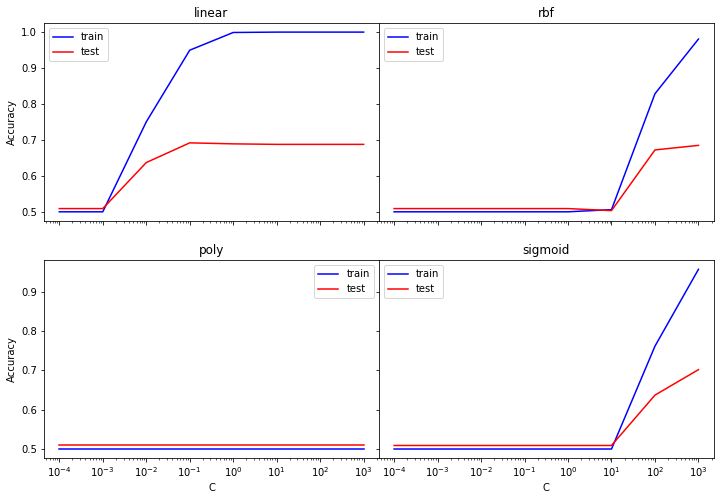

In [9]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    #print("Param C= ", param, 'Kernel= ', kernel)
    model= SVM(gamma='auto')
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

def mul_kernels_SVM(x, y, xv, yv, Cs, kernels, do_SVM):
    print(len(kernels)/2, len(kernels)/2)
    fig, axs = plt.subplots(int(len(kernels)/2), int(len(kernels)/2), 
                            sharex='col', sharey='row', 
                            gridspec_kw={'hspace': 0.2, 'wspace': 0},
                            figsize=(12,8)
                           )
    for i, kernel in enumerate(kernels):
        train_error = []
        test_error = []
        for c in Cs:
            model, train_acc, test_acc = do_SVM(x, y, xv, yv, param=c, kernel=kernel)
            train_error.append(train_acc)
            test_error.append(test_acc)
        axs[i%2, int(i/2)].plot(Cs, train_error, 'b', label='train')
        axs[i%2, int(i/2)].plot(Cs, test_error, 'r',label='test')
        axs[i%2, int(i/2)].set_title(kernel)
        axs[i%2, int(i/2)].legend()
    for ax in axs.flat:
        ax.set(xlabel='C', ylabel='Accuracy', xscale='log')
    for ax in axs.flat:
        ax.label_outer()
    plt.legend()
    plt.show()
        
mul_kernels_SVM(features_train, labels_train, features_val, labels_val, Cs=Cs, kernels=kernels, do_SVM=do_SVM)


> h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.
```python
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(1, features_train.shape[1], steps)
```

[   1  101  201  301  401  501  601  701  801  901 1001 1101 1201 1301
 1401 1501 1601 1701 1801 1901 2001 2101 2201 2301 2401 2501 2601 2701
 2801]


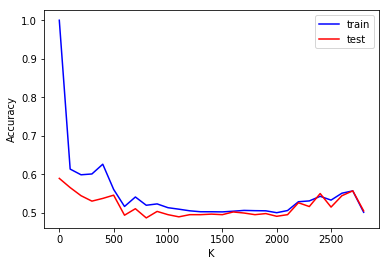

[1.0, 0.6134365107281041, 0.5986633837495603, 0.6007738304607808, 0.6260991909954273, 0.5606753429475906, 0.5163559620119592, 0.5409778403095322, 0.51952163207879, 0.5230390432641576, 0.5131902919451284, 0.509321139641224, 0.505100246218783, 0.5026380583890256, 0.5026380583890256, 0.5022863172704889, 0.5040450228631727, 0.5061554695743933, 0.5054519873373198, 0.505100246218783, 0.5001758705592684, 0.5058037284558565, 0.5286669011607457, 0.5307773478719663, 0.542736545902216, 0.5328877945831868, 0.5508265916285614, 0.5568061906436862, 0.5012310939148786]


In [10]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    #print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

Ks = np.arange(1, features_train.shape[0], 100)

print(Ks)

train_accuracy = []
test_accuracy = []

for k in Ks:
    model, train_acc, test_acc = do_KNN(features_train, labels_train, features_val, labels_val, k)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

plt.plot(Ks, train_accuracy, 'b', label='train')
plt.plot(Ks, test_accuracy, 'r', label='test')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(train_accuracy)

> i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.
```python
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], steps ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , steps ) #choose steps
```

(86,) (285,)


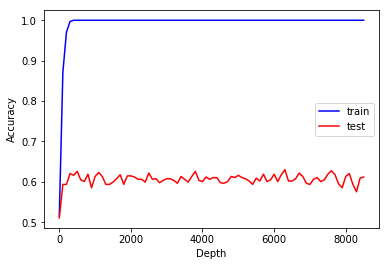

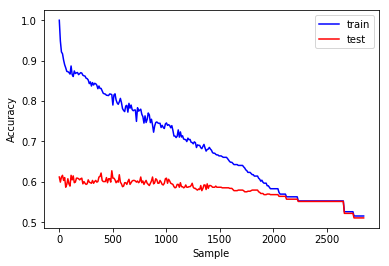

'\nmodel, train, test = do_Tree(features_train, labels_train, features_val, labels_val, param_d=Depths, param_m=2)\nmodel.get_params()'

In [11]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    #print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], 100) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 10 ) #choose steps
print(Depths.shape, SamplesS.shape)

train_accuracy_by_depth = []
test_accuracy_by_depth = []

for depth in Depths:
    model, train_acc, test_acc = do_Tree(features_train, labels_train, features_val, labels_val, param_d=depth)
    train_accuracy_by_depth.append(train_acc)
    test_accuracy_by_depth.append(test_acc)
plt.plot(Depths, train_accuracy_by_depth, 'b', label='train')
plt.plot(Depths, test_accuracy_by_depth, 'r', label='test')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

train_accuracy_by_sample = []
test_accuracy_by_sample = []

for sample in SamplesS:
    model, train_acc, test_acc = do_Tree(features_train, labels_train, features_val, labels_val, param_m=sample)
    train_accuracy_by_sample.append(train_acc)
    test_accuracy_by_sample.append(test_acc)
plt.plot(SamplesS, train_accuracy_by_sample, 'b', label='train')
plt.plot(SamplesS, test_accuracy_by_sample, 'r', label='test')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Accuracy')
plt.show()

'''
model, train, test = do_Tree(features_train, labels_train, features_val, labels_val, param_d=Depths, param_m=2)
model.get_params()'''

> j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.
```python
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]
```

Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
Neuron hidden =  64
Neuron hidden =  128
Neuron hidden =  256
Neuron hidden =  512
[0.8934224247932434, 0.8702075481414795, 0.9060851335525513, 0.8962363600730896, 0.8979950547218323, 0.9064368605613708, 0.9057334065437317, 0.9060851335525513, 0.9106577634811401]
[0.697609007358551, 0.6919831037521362, 0.7060478329658508, 0.707454264163971, 0.7102672457695007, 0.7060478329658508, 0.700421929359436, 0.6919831037521362, 0.7046413421630859]


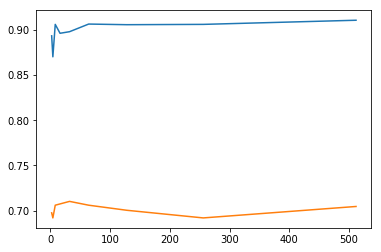

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param, act_hidden='linear'):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation=act_hidden))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc

def plt_ANN(x, y, xv, yv, range_nh, act_hidden='linear'):
    train_accuracy = []
    test_accuracy = []
    for n in range_nh:
        model, train_acc, test_acc = do_ANN(x, y, xv, yv, n, act_hidden=act_hidden)
        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)
    print(train_accuracy)
    print(test_accuracy)
    plt.plot(range_nh, train_accuracy)
    plt.plot(range_nh, test_accuracy)
    plt.show()

N_h = [2**i for i in range(1,10)]
plt_ANN(features_train, labels_train, features_val, labels_val, N_h)


> k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

> l) Para comparar sus resultados utilice el modelo VADER (*Valence Aware Dictionary and sEntiment Reasoner*) [[6]](#refs), el cual entrega una *score* de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.
```python
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)
```
>> Para instalar VADER ejecute en consola:
```
pip install vaderSentiment
```

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

> m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación *TF* genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.
```python
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)
vocab
```

In [16]:
V = len(vocab)
word_scores = np.zeros((V, 2))

#Neural network 
model, train_acc, test_acc = do_ANN(features_train, labels_train, features_val, labels_val, 32)

pw = []
nw = [] 

for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_score = model.predict_proba(x_word)
    word_scores[i] = model.predict_proba(x_word)
    if word_score > 0.6:
        pw.append([vocab[i], word_score[0,0]])
    elif word_score < 0.3:
        nw.append([vocab[i], word_score[0,0]])
pw = np.array(pw)
nw = np.array(nw)

positive_words = pd.DataFrame()
negative_words = pd.DataFrame()
positive_words['Word'] = pw[:,0]
positive_words['Score'] = pw[:,1]

negative_words['Word'] = nw[:,0]
negative_words['Score'] = nw[:,1]

print(positive_words)
print(negative_words)

Neuron hidden =  32
            Word       Score
0      beautiful  0.60319513
1           best   0.6209117
2   entertaining   0.6377257
3            fun   0.6514142
4          heart   0.6547392
5        history   0.6018876
6          human  0.62260807
7           life  0.65686196
8         moving   0.6610672
9    performance   0.6585431
10         still    0.617092
11          work   0.6339366
12         world   0.7066886
          Word       Score
0       acting  0.29855672
1          bad  0.16149095
2       boring    0.280352
3           ca  0.29294094
4       cliche  0.23657231
5         dull  0.24217515
6        fails  0.29110372
7         feel  0.22741905
8        heavy  0.26464713
9        might  0.29276586
10     nothing  0.29786837
11      really  0.23473252
12       silly  0.25355196
13       title   0.2614373
14          tv  0.27282375
15  ultimately  0.26756254
16          wa  0.29169112
17       worst  0.28732717


> n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de *stemmming* [[7]](#refs) en lugar de *lemmatization* para llevar a su tronco léxico.
```python
from nltk.stem.porter import PorterStemmer
wordstemmer = PorterStemmer()
wordstemmer.stem(word)
```

In [87]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
from cucco import Cucco 

cucco = Cucco()

def get_common_words(texts, n=100):
    all_documents = ''
    for t in texts:
        all_documents += ' ' + t
        
    wordtokens = word_tokenize(all_documents)
    fDist = nltk.FreqDist(wordtokens)
    most_freq_words = fDist.most_common(n)
    n_common_words = []
    for word, freq in most_freq_words:
        n_common_words.append(word)
    return n_common_words

def base_word(word, type='Lemmatizer'):
    if type == 'Lemmatizer':
        wordlemmatizer = WordNetLemmatizer()
        return wordlemmatizer.lemmatize(word)
    else:
        wordstemmer = PorterStemmer()
        return wordstemmer.stem(word)
    
def word_extractor(text, common_words = [], type='Lemmatizer'):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    text = re.sub(r'\d+', '', text)
    text = cucco.normalize(text)
    words = ""
    wordtokens = [ base_word(word.lower(), type='Lemmatizer') if type == 'Lemmatizer' else base_word(word.lower(), type='Stemming') for word in word_tokenize(text) ]
    common = False
    if common_words == []:
        common = True
    for word in wordtokens:
        if (word not in commonwords) and (len(word)>3) and (common or word in common_words): #delete stopwords
            words+=" "+word
    return words

texts_train_stemming = [word_extractor(text, type='Stemming') for text in df_train_text]
texts_val_stemming = [word_extractor(text, type='Stemming') for text in df_val_text]
texts_test_stemming = [word_extractor(text, type='Stemming') for text in df_test_text]


vectorizer= CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train_stemming)

#Matriz dispersa con texto x terminos, con nº de ocurrencias
f_train_stemming = vectorizer.transform(texts_train_stemming)
f_val_stemming = vectorizer.transform(texts_val_stemming)
f_test_stemming = vectorizer.transform(texts_test_stemming)

vocab_stemming = vectorizer.get_feature_names()

print(f_train_stemming.shape)


(2843, 6695)


Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
Neuron hidden =  64
Neuron hidden =  128
Neuron hidden =  256
Neuron hidden =  512
[0.8635244369506836, 0.8392543196678162, 0.855786144733429, 0.8512135148048401, 0.8508617877960205, 0.8279985785484314, 0.8403095602989197, 0.8522687554359436, 0.8445304036140442]
[0.6779184341430664, 0.6568213701248169, 0.6680731177330017, 0.655414879322052, 0.6610407829284668, 0.6582278609275818, 0.655414879322052, 0.6638537049293518, 0.6624472737312317]


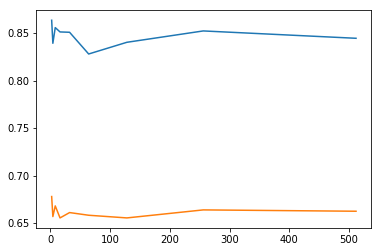

In [52]:
N_h = [ 2**i for i in range(1,10)]
plt_ANN(f_train_stemming, labels_train, f_val_stemming, labels_val, N_h, act_hidden='relu')

Param C=  0.0001
Param C=  0.001
Param C=  0.01
Param C=  0.1
Param C=  1.0
Param C=  10.0
Param C=  100.0
Param C=  1000.0


c:\users\castillo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


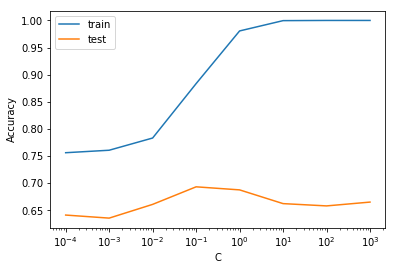

In [19]:
plt_LOGIT(f_train_stemming, labels_train, f_val_stemming, labels_val, Cs=Cs)

2.0 2.0


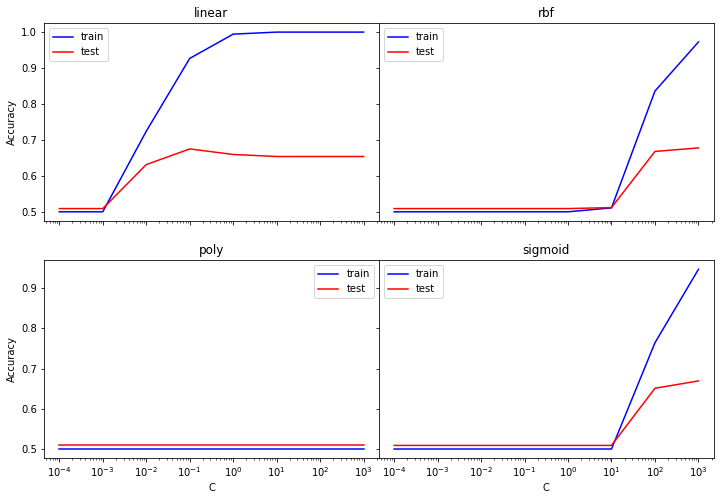

In [20]:
mul_kernels_SVM(f_train_stemming, labels_train, f_val_stemming, labels_val, Cs=Cs, kernels=kernels, do_SVM=do_SVM)

> o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar *n-gramas*, entre otras.
```python
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
tfidf_model.transform(texts_train)
... #for val and test
```

In [104]:
common_words = get_common_words(texts_train_stemming, n = 500)
print(common_words)
texts_train_2 = [word_extractor(text, type='Stemming', common_words=common_words) for text in df_train_text]
texts_val_2 = [word_extractor(text, type='Stemming', common_words=common_words) for text in df_val_text]

['film', 'movi', 'make', 'stori', 'charact', 'time', 'work', 'comedi', 'perform', 'good', 'feel', 'funni', 'director', 'entertain', 'thing', 'doesnt', 'love', 'watch', 'cast', 'audienc', 'plot', 'year', 'life', 'made', 'long', 'filmmak', 'minut', 'isnt', 'great', 'drama', 'interest', 'take', 'enjoy', 'moment', 'play', 'direct', 'emot', 'live', 'action', 'sens', 'ultim', 'actor', 'human', 'point', 'effect', 'show', 'power', 'script', 'pictur', 'peopl', 'kind', 'tale', 'hollywood', 'documentari', 'find', 'scene', 'humor', 'world', 'visual', 'materi', 'offer', 'move', 'gener', 'heart', 'full', 'charm', 'part', 'laugh', 'thriller', 'american', 'romant', 'real', 'lack', 'clich', 'beauti', 'turn', 'special', 'back', 'piec', 'star', 'idea', 'imagin', 'origin', 'hard', 'manag', 'music', 'titl', 'subject', 'cultur', 'famili', 'dont', 'engag', 'dark', 'flick', 'predict', 'screen', 'intellig', 'dialogu', 'mind', 'touch', 'care', 'rare', 'surpris', 'viewer', 'experi', 'familiar', 'deliv', 'product

  (1, 15)	0.289004556012106
  (6, 96)	0.22643340397356343
  (9, 50)	0.38824092010245687
  (10, 100)	0.3177824323425025
  (11, 62)	0.4996509743450495
  (22, 164)	0.3516862145395243
  (24, 23)	0.437557389048633
  (25, 138)	0.31185269979367164
  (27, 50)	0.2506629471274484
  (29, 127)	0.3278907547510597
  (29, 44)	0.23771582320695564
  (30, 181)	0.2251684867509608
  (34, 193)	0.2991193245886395
  (38, 106)	0.35909186328928766
  (39, 44)	0.29483140733574353
  (43, 70)	0.41652227899411554
  (44, 150)	0.46720866274828915
  (46, 196)	0.25901816649621257
  (46, 173)	0.2913372258033436
  (52, 73)	0.273300453049795
  (53, 75)	0.42915723539856154
  (59, 164)	1.0
  (73, 162)	0.4320835437536608
  (81, 157)	0.2538170239109605
  (88, 50)	0.27616290139369437
  (92, 65)	0.37257552236210006
  (102, 196)	0.37180667932868156
  (108, 44)	0.21318887921106097
  (113, 157)	0.21737880651192415
  (116, 66)	0.47915316953872017
  (118, 124)	0.346400000023873
  (123, 50)	0.3131575603452663
  (133, 73)	0.2755133717

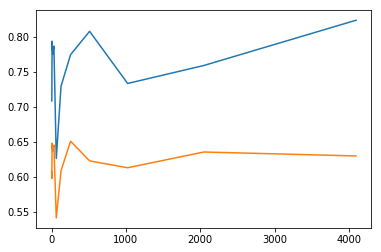

In [99]:
N_h = [ 2**i for i in range(1,13)]
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train_stemming)
x = tfidf_model.transform(texts_train_2)
x_val = tfidf_model.transform(texts_val_2)
tfidf_model.get_feature_names()
print(x[0:200,0:200])
plt_ANN(x, labels_train, x_val, labels_val, N_h, act_hidden='relu')

2.0 2.0


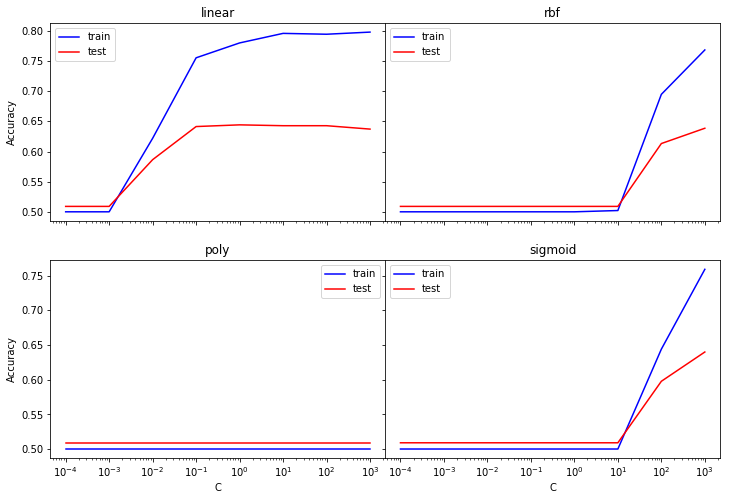

In [105]:
vectorizer2= CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer2.fit(texts_train_2)

#Matriz dispersa con texto x terminos, con nº de ocurrencias
f_train_2 = vectorizer.transform(texts_train_2)
f_val_2 = vectorizer.transform(texts_val_2)
f_test_2 = vectorizer.transform(texts_test_stemming)
mul_kernels_SVM(f_train_2, labels_train, f_val_2, labels_val, Cs=Cs, kernels=kernels, do_SVM=do_SVM)

> p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?
```python
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )
```

In [130]:
from sklearn.metrics import classification_report

model, train_acc, test_acc = do_ANN(features_train, labels_train, features_val, labels_val, 32)

def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x)))
#score_the_model(model, features_test, labels_test )

Neuron hidden =  32


> q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.
```python
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)
```

In [134]:
classes_weights = {0: 100, 1: 1000} #or choose..

model= SVM(gamma='auto')
model.set_params(C=1,kernel='linear', class_weight=classes_weights) #try rbf and linear at least
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      1803
         1.0       0.69      0.73      0.71      1751

   micro avg       0.70      0.70      0.70      3554
   macro avg       0.71      0.70      0.70      3554
weighted avg       0.71      0.70      0.70      3554



> r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente
```python
test_pred = log_model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)
```

> s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

<a id="segundo"></a>
## 2. Problema de Múltiples Anotaciones

El aprendizaje supervisado visto en clases da cuenta que existe una única posible etiqueta $z$ (*ground truth*) asociada a un dato $x$ para poder aprender de los datos. Sin embargo, la definición del *ground truth* en algunos casos puede resultar bastante difícil de definir o bastante costoso, por ejemplo en problemas médicos donde se deben realizar invasivos exámenes para conocer la "verdad absoluta". Como alternativa se pueden recolectar múltiples anotaciones desde personas inexpertas en el área para poder estimar el *ground truth*. 

<img src="http://www.irishenvironment.com/wp-content/uploads/2013/11/crowdsourcing.jpg" title="Title text" width="40%" />

En esta actividad se trabajará en el caso en que contamos con múltiples anotaciones por cada dato de entrada $x_i$ dadas por personas inexpertas a través de Amazon Mechanical Turk (__[AMT](https://www.mturk.com/)__), es decir, $y^{(1)}, y^{(2)} \ldots y^{(T_i)}$. El problema de predicción trabajado será el mismo de la actividad anterior, el análisis de sentimiento de un extracto de texto en Rotten Tomatoes. Los datos trabajados [[8]](#refs) pueden ser descargados de la página del autor.
```
wget http://fprodrigues.com//mturk-datasets.tar.gz
```

De esta manera trabajaremos con el archivo *mturk_answers.csv* en la carpeta *sentiment polarity* que se puede cargar con pandas. En este archivo se tendrán múltiples filas/registros por cada dato de entrenamiento, cada uno representando la etiqueta que entregó una persona (*worker*) a ese dato, los detalles de columnas son:
* *WorkerId*: identificador de la persona que etiquetó/anotó el dato
* *Input.id*: identificador del dato a etiquetar/anotar
* *Input.original_sentence*: texto original del dato
* *Input.stemmed_sent*: texto pre-procesado
* *Input.true_sent*: sentimiento real (*ground truth*) del dato
* *Answer.sent*:   etiqueta/anotación que entregó la persona

```python
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv") 
```

> El objetivo de la actividad será el de obtener un modelo predictor del *ground truth* sin entrenar directamente con esto, sino que utilizar las múltiples anotaciones de las personas

### Importante
* Deberá crear un conjunto aleatorio de pruebas que solo contenga los textos y el sentimiento *ground truth* (sin repeticiones)
* Los valores de *ground truth* están **solo para evaluar**, no puede utilizarlos para entrenar o tomar decisiones en su modelo.
* La métrica de evaluación será el *accuracy score*
```python
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)
```

#### Sugerencias
Para representar los textos, a diferencia de lo visto en la sección 1, se puede utilizar lo que son la representación vectorial de palabras (*word vectors*), a través de modelos especializados entrenados para aprender una representación en que palabras similares estén cercanas en el espacio vectorial. Puede utilizar los vectores livianos de __[GLOVE](https://nlp.stanford.edu/projects/glove/)__ en su versión entradas en textos de Wikipedia con 6 billones de palabras/tokens.
```python
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE) as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
...
embeddings_index.get(word)
```
> Para descargar GLOVE
```
wget http://nlp.stanford.edu/data/glove.6B.zip
```

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.